# Handwritten Digit Classification in Pytorch

The goal here is to classify hand-drawn images of the numbers 0-9 and build and train a neural network to recognize and predict the correct label for the digit displayed. The dataset we will be using in this tutorial is called the MNIST dataset, and it is a classic in the machine learning community. This dataset is made up of images of handwritten digits, 28x28 pixels in size. Here are some examples of the digits included in the dataset:
![title](MNIST.png)

In this notebook our main focus is to use different utility packages provided within PyTorch (nn, autograd, optim, torchvision, torchtext, etc.) to build and train neural networks. 

## Step1: Import MNIST Dataset  and Preprocess it

In [1]:
from torchvision import transforms
from torchvision.datasets import MNIST
import torch.nn.functional as F

In [2]:
### Data Preprocessing: We need to transform the raw dataset into tensors and normalize them in a fixed range.
### The torchvision package provides a utility called transforms which can be used to combine different 
### transformations together.

transform_tasks = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

The first transformation converts the raw data into tensor variables and the second transformation performs normalization using the below operation:

x_normalized = x-mean / std

The values 0.5 and 0.5 represent the mean and standard deviation for 3 channels: red, green, and blue.

In [3]:
## Load MNIST Dataset and apply transformations
mnist = MNIST("data", download=True, train=True, transform=transform_tasks)

Processing...
Done!


### DataLoader: 
iterators which provide the ability to batch, shuffle and load the data in parallel using multiprocessing workers. For the purpose of evaluating our model, we will partition our data into training and validation sets.

In [4]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [5]:
## create training and validation split 
split = int(0.8 * len(mnist))
index_list = list(range(len(mnist)))
train_idx, valid_idx = index_list[:split], index_list[split:]

In [6]:
## create sampler objects using SubsetRandomSampler
tr_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(valid_idx)

In [7]:
## create iterator objects for train and valid datasets
trainloader = DataLoader(mnist, batch_size=256, sampler=tr_sampler)
validloader = DataLoader(mnist, batch_size=256, sampler=val_sampler)

## Step2: Defining the Neural Network
The architecture of the neural network refers to elements such as the number of layers in the network, the number of units in each layer, and how the units are connected between layers. In the inline below, add the number of units per layer in global variables. 


In [8]:
import torch.nn.functional as F
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 512)
        self.hidden2 = nn.Linear(512, 256)
        self.hidden3 = nn.Linear(256, 128)
        self.output = nn.Linear(128, 10)
  
    def forward(self, x):
        x = self.hidden1(x)
        x = F.sigmoid(x)
        x = self.hidden2(x)
        x = F.sigmoid(x)
        x = self.hidden3(x)
        x = F.sigmoid(x)
        x = self.output(x)
        return x



In [9]:
model = Model()

### Loss Function and Optimizer
Define the loss function and the optimizer using the nn and optim package:

In [10]:
from torch import optim

In [11]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay= 1e-6, momentum = 0.9, nesterov = True)

In [ ]:
import numpy as np

for epoch in range(1, 25): ## run the model for 10 epochs
    train_loss, valid_loss = [], []
    
    ## training part 
    model.train()
    for data, target in trainloader:
        
        data = data.reshape(-1,28*28)
      #  print(data.shape, target.shape)
        optimizer.zero_grad()
        
            ## 1. forward propagation
        output = model(data)
        
        ## 2. loss calculation
        loss = loss_function(output, target)
        
        ## 3. backward propagation
        loss.backward()
        
        ## 4. weight optimization
        optimizer.step()
        
        train_loss.append(loss.item())
        
    ## evaluation part 
    model.eval()
    for data, target in validloader:
        
        data = data.reshape(-1,28*28)
        output = model(data)
        loss = loss_function(output, target)
        valid_loss.append(loss.item())
        
    print ("Epoch:", epoch, "Training Loss: ", np.mean(train_loss), "Valid Loss: ", np.mean(valid_loss))
        


/home/isha.d/.local/lib/python3.5/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 Training Loss:  2.304696355728393 Valid Loss:  2.30285906791687
Epoch: 2 Training Loss:  2.3016483631539852 Valid Loss:  2.3012256419405026
Epoch: 3 Training Loss:  2.2992971171724035 Valid Loss:  2.2981312731479075
Epoch: 4 Training Loss:  2.296308277769292 Valid Loss:  2.2950302184896265
Epoch: 5 Training Loss:  2.2914537825482957 Valid Loss:  2.287853575767355
Epoch: 6 Training Loss:  2.2788803450604704 Valid Loss:  2.268470231522905
Epoch: 7 Training Loss:  2.226193149039086 Valid Loss:  2.1527980794297887
Epoch: 8 Training Loss:  1.9590909817117326 Valid Loss:  1.768364355919209


## Prediction on test data

In [39]:
dataiter = iter(validloader)
data, labels = dataiter.next()
images = data
data = data.reshape(-1,28*28)
output = model(data)

/home/isha.d/.local/lib/python3.5/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [40]:
import torch 
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy())

In [41]:
### Test Accuracy ###
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, preds))

0.91796875


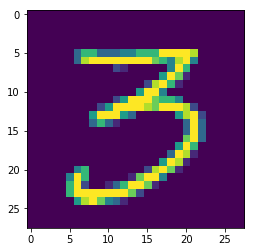

Actual: tensor(3)
Predicted: 3


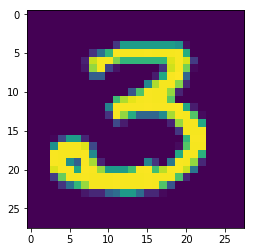

Actual: tensor(3)
Predicted: 3


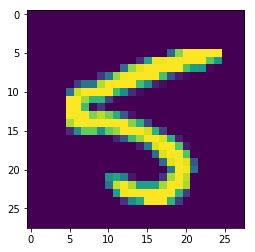

Actual: tensor(5)
Predicted: 5


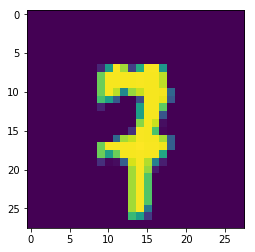

Actual: tensor(7)
Predicted: 7


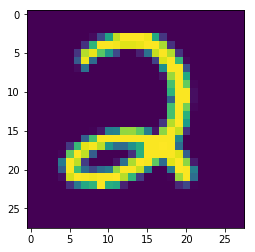

Actual: tensor(2)
Predicted: 2


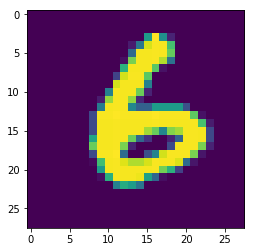

Actual: tensor(6)
Predicted: 6


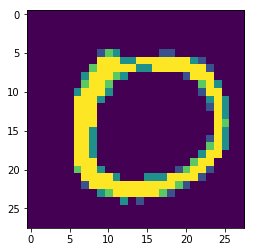

Actual: tensor(0)
Predicted: 0


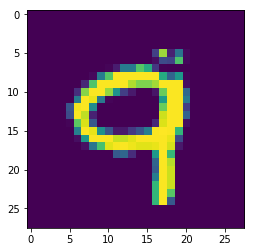

Actual: tensor(9)
Predicted: 9


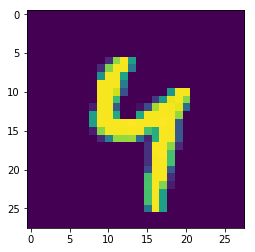

Actual: tensor(4)
Predicted: 4


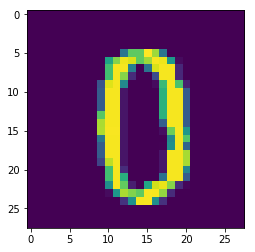

Actual: tensor(0)
Predicted: 0


In [42]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(images[i][0])
    plt.show()
    print ("Actual:", labels[i])
    print ("Predicted:", preds[i])